In [4]:
import sys
sys.path.append('..')
from autogrp import * 
from itertools import permutations
import random

In [5]:
__counter = 2

In [6]:
def random_group(size):
    global __counter 
    __counter += 1
    perms = [[i, i] for i in range(size)]
    atoms = [] 

    # це я так рандомні транспозиції обираю
    for i in range(size-1):
        while (pi := sorted([random.randint(0, size-1), 
                             random.randint(0, size-1)])
              ) in perms:
            pass 
        perms.append(pi)
        tmp_perm = list(range(size))
        tmp_perm[pi[0]] = pi[1]
        tmp_perm[pi[1]] = pi[0]
        tmp_perm = Permutation(tmp_perm)
        si = AutomataGroupElement(f's{i}', tmp_perm, 
                                  children=tuple('e' for _ in range(size)), 
                                  is_atom=True)
        atoms.append(si)
    
    sd = AutomataGroupElement(f's{size-1}', 
                              Permutation(list(range(size))), 
                              children=tuple(f's{i}' for i in range(size)), 
                              is_atom=True)
    atoms.append(sd)
    return AutomataGroup(f"G#{__counter}", atoms)


In [7]:
def test_periodic(group, trust_degree):
    for el in all_words(group.alphabet, max_len=trust_degree):
        el = group(el)
        if not el.is_finite():
            return False, el
    return True, None

suspicious = []

for n, tests in [[6, 100]]:#[[3, 10], [4, 100], [5, 100], [6, 1000]]:
    print(n)
    for _ in range(tests):
        tmp_group = random_group(n)
        res, _ = test_periodic(tmp_group, 4)
        if res: 
            suspicious.append(tmp_group)


6


In [8]:
suspicious

[
         
 AutomataGroup G#6
         
 over alphabet {'5', '1', '4', '3', '2', '0'}
         
 generated by <G#6(s0 = (5)(1 2) (e, e, e, e, e, e)), G#6(s1 = (3 5) (e, e, e, e, e, e)), G#6(s2 = (4 5) (e, e, e, e, e, e)), G#6(s3 = (5)(0 1) (e, e, e, e, e, e)), G#6(s4 = (0 5) (e, e, e, e, e, e)), G#6(s5 = (5) (s0, s1, s2, s3, s4, s5))>.
         ,
 
         
 AutomataGroup G#7
         
 over alphabet {'5', '1', '4', '3', '2', '0'}
         
 generated by <G#7(s0 = (5)(0 1) (e, e, e, e, e, e)), G#7(s1 = (5)(2 4) (e, e, e, e, e, e)), G#7(s2 = (5)(1 4) (e, e, e, e, e, e)), G#7(s3 = (1 5) (e, e, e, e, e, e)), G#7(s4 = (5)(0 3) (e, e, e, e, e, e)), G#7(s5 = (5) (s0, s1, s2, s3, s4, s5))>.
         ,
 
         
 AutomataGroup G#10
         
 over alphabet {'5', '1', '4', '3', '2', '0'}
         
 generated by <G#10(s0 = (5)(2 3) (e, e, e, e, e, e)), G#10(s1 = (5)(0 3) (e, e, e, e, e, e)), G#10(s2 = (5)(1 4) (e, e, e, e, e, e)), G#10(s3 = (5)(3 4) (e, e, e, e, e, e)), G#10(s4 = (5)(0 1) (e

In [9]:
G = suspicious[-1]

In [10]:
test_periodic(G, 6)

(False, G#102(s0s1s2s3s4s5 = (0 5 1 4 3 2) (s0, s1, s2, s3, s4, s5)))

In [11]:
G


        
AutomataGroup G#102
        
over alphabet {'5', '1', '4', '3', '2', '0'}
        
generated by <G#102(s0 = (5)(3 4) (e, e, e, e, e, e)), G#102(s1 = (3 5) (e, e, e, e, e, e)), G#102(s2 = (1 5) (e, e, e, e, e, e)), G#102(s3 = (5)(0 2) (e, e, e, e, e, e)), G#102(s4 = (5)(0 3) (e, e, e, e, e, e)), G#102(s5 = (5) (s0, s1, s2, s3, s4, s5))>.
        

In [12]:
s0 = G('s0')
s1 = G('s1')
s2 = G('s2')
s3 = G('s3')
s4 = G("s4")
s5 = G('s5')

In [36]:
P = PermutationGroup([[(1, 2)], [(4, 5)], [(1, 6)], [(3, 5)], [(2, 3)]])

In [40]:
test_periodic(G, trust_degree=10)

(False, G#136(s0s1s2s3s4s5 = (0 5 1 3 4 2) (s0, s1, s2, s3, s4, s5)))

In [60]:
G = random_group(6)
print(G)
test_periodic(G, trust_degree=6)


AutomataGroup G#150
over alphabet {'5', '2', '0', '3', '1', '4'}
generated by <G#150(s0 = (5)(0 4) (e, e, e, e, e, e)), G#150(s1 = (0 5) (e, e, e, e, e, e)), G#150(s2 = (5)(3 4) (e, e, e, e, e, e)), G#150(s3 = (5)(0 3) (e, e, e, e, e, e)), G#150(s4 = (5)(1 2) (e, e, e, e, e, e)), G#150(s5 = (5) (s0, s1, s2, s3, s4, s5))>.
        


(True, None)

In [13]:
perms = []
for el in G.gens:
    if el.permutation.order() == 1: continue
    perms.append([tuple(cycle) for cycle in el.permutation.cyclic_form])

perms

[[(3, 4)], [(3, 5)], [(1, 5)], [(0, 2)], [(0, 3)]]

In [69]:
PermutationGroup(perms).cardinality()

720

In [15]:
G


        
AutomataGroup G#102
        
over alphabet {'5', '1', '4', '3', '2', '0'}
        
generated by <G#102(s0 = (5)(3 4) (e, e, e, e, e, e)), G#102(s1 = (3 5) (e, e, e, e, e, e)), G#102(s2 = (1 5) (e, e, e, e, e, e)), G#102(s3 = (5)(0 2) (e, e, e, e, e, e)), G#102(s4 = (5)(0 3) (e, e, e, e, e, e)), G#102(s5 = (5) (s0, s1, s2, s3, s4, s5))>.
        

====================G#102(s0s1s2s3s4s5 = (0 5 1 4 3 2) (s0, s1, s2, s3, s4, s5))====================
Group:     
AutomataGroup G#102
over alphabet {'5', '1', '4', '3', '2', '0'}
generated by <G#102(s0 = (5)(3 4) (e, e, e, e, e, e)), G#102(s1 = (3 5) (e, e, e, e, e, e)), G#102(s2 = (1 5) (e, e, e, e, e, e)), G#102(s3 = (5)(0 2) (e, e, e, e, e, e)), G#102(s4 = (5)(0 3) (e, e, e, e, e, e)), G#102(s5 = (5) (s0, s1, s2, s3, s4, s5))>.
        
size:      34
height:    5

Generation: 0, element: s0s1s2s3s4s5
Generation: 1, element: s2s3s4s1s5s0
Generation: 2, element: s2s5s1s3s4s0
Generation: 3, element: s0s2s4s3s1s5
Generation: 4, element: s5s1s3s4s2s0
Generation: 5, element: s0s2s4s3s1s5
Found cycle between s0s2s4s3s1s5 and s0s2s4s3s1s5 of length 36.0

is finite: False
order:     inf

Found cycle
    start deep:   3
    end deep:     5
    start el:     s0s2s4s3s1s5
    end el:       s0s2s4s3s1s5
    start power:  216
    end power:    7776
    cycle weight: 36.0
    full path:    00000
  

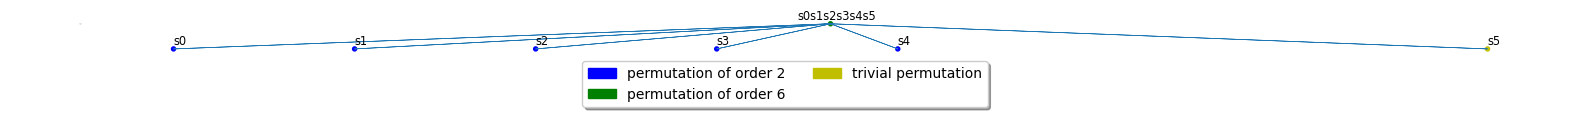

In [14]:
G('s0s1s2s3s4s5').describe()

In [37]:
P.cardinality()

720

======================G#136(s3s2s0s5 = (0 1 5)(2 4) (s0, s1, s2, s3, s4, s5))======================
Group:     
AutomataGroup G#136
over alphabet {'5', '2', '0', '3', '1', '4'}
generated by <G#136(s0 = (5)(0 1) (e, e, e, e, e, e)), G#136(s1 = (5)(3 4) (e, e, e, e, e, e)), G#136(s2 = (0 5) (e, e, e, e, e, e)), G#136(s3 = (5)(2 4) (e, e, e, e, e, e)), G#136(s4 = (5)(1 2) (e, e, e, e, e, e)), G#136(s5 = (5) (s0, s1, s2, s3, s4, s5))>.
        
size:      30
height:    5

Generation: 0, element: s3s2s0s5
Generation: 1, element: s5s1s0
Generation: 1, element: s4s2
Generation: 1, element: s3
Generation: 2, element: s0s1
Generation: 2, element: s2
Generation: 2, element: s3s4
Generation: 2, element: s5
Generation: 2, element: e
Generation: 2, element: e
Generation: 2, element: e
Generation: 2, element: e
Generation: 2, element: e
Generation: 2, element: e
Generation: 2, element: e
Generation: 2, element: e
Generation: 2, element: e
Generation: 3, element: e
Generation: 3, element: e
Generatio

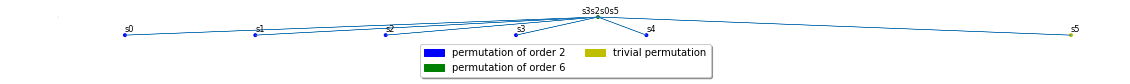

In [34]:
(s3 * s2 * s0 * s5).describe()

In [9]:
suspicious

[
AutomataGroup G#20
over alphabet {'2', '1', '0', '3'}
generated by <G#20(s0 = (3)(0 2) (e, e, e, e)), G#20(s1 = (3)(1 2) (e, e, e, e)), G#20(s2 = (3)(0 1) (e, e, e, e)), G#20(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#45
over alphabet {'2', '1', '0', '3'}
generated by <G#45(s0 = (3)(0 2) (e, e, e, e)), G#45(s1 = (3)(0 1) (e, e, e, e)), G#45(s2 = (3)(1 2) (e, e, e, e)), G#45(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#55
over alphabet {'2', '1', '0', '3'}
generated by <G#55(s0 = (3)(0 2) (e, e, e, e)), G#55(s1 = (3)(1 2) (e, e, e, e)), G#55(s2 = (3)(0 1) (e, e, e, e)), G#55(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#72
over alphabet {'2', '1', '0', '3'}
generated by <G#72(s0 = (3)(0 2) (e, e, e, e)), G#72(s1 = (3)(0 1) (e, e, e, e)), G#72(s2 = (3)(1 2) (e, e, e, e)), G#72(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#116
over alphabet {'2', '1', '4', '0', '3'}
generated by <G#116(s0 = (4)(0 2) (e, e, e, e, e)), G#116(s1 = (4)(2 3

In [11]:
import time


In [16]:
next_suspicious = []
start = time.time()
for i, group in enumerate(suspicious):
    res, _ = test_periodic(group, 6)
    info(i, len(suspicious))
    if res:
        next_suspicious.append(group)

done: 22.5806%

KeyboardInterrupt: 

In [17]:
for group in suspicious:
    group.clear_memory()

In [18]:
next_suspicious

[
AutomataGroup G#20
over alphabet {'2', '1', '0', '3'}
generated by <G#20(s0 = (3)(0 2) (e, e, e, e)), G#20(s1 = (3)(1 2) (e, e, e, e)), G#20(s2 = (3)(0 1) (e, e, e, e)), G#20(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#45
over alphabet {'2', '1', '0', '3'}
generated by <G#45(s0 = (3)(0 2) (e, e, e, e)), G#45(s1 = (3)(0 1) (e, e, e, e)), G#45(s2 = (3)(1 2) (e, e, e, e)), G#45(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#55
over alphabet {'2', '1', '0', '3'}
generated by <G#55(s0 = (3)(0 2) (e, e, e, e)), G#55(s1 = (3)(1 2) (e, e, e, e)), G#55(s2 = (3)(0 1) (e, e, e, e)), G#55(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#72
over alphabet {'2', '1', '0', '3'}
generated by <G#72(s0 = (3)(0 2) (e, e, e, e)), G#72(s1 = (3)(0 1) (e, e, e, e)), G#72(s2 = (3)(1 2) (e, e, e, e)), G#72(s3 = (3) (s0, s1, s2, s3))>.
         ,
 
AutomataGroup G#117
over alphabet {'2', '1', '4', '0', '3'}
generated by <G#117(s0 = (4)(0 2) (e, e, e, e, e)), G#117(s1 = (4)(2 3

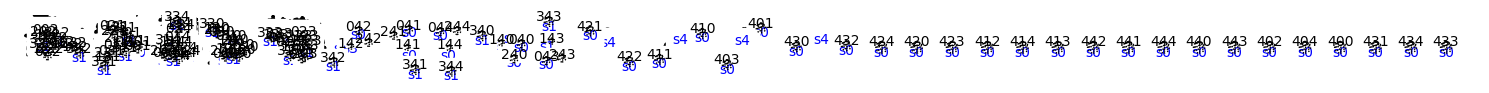

In [22]:
graph = schreier_graph(next_suspicious[-1], DiGraph, level=3)

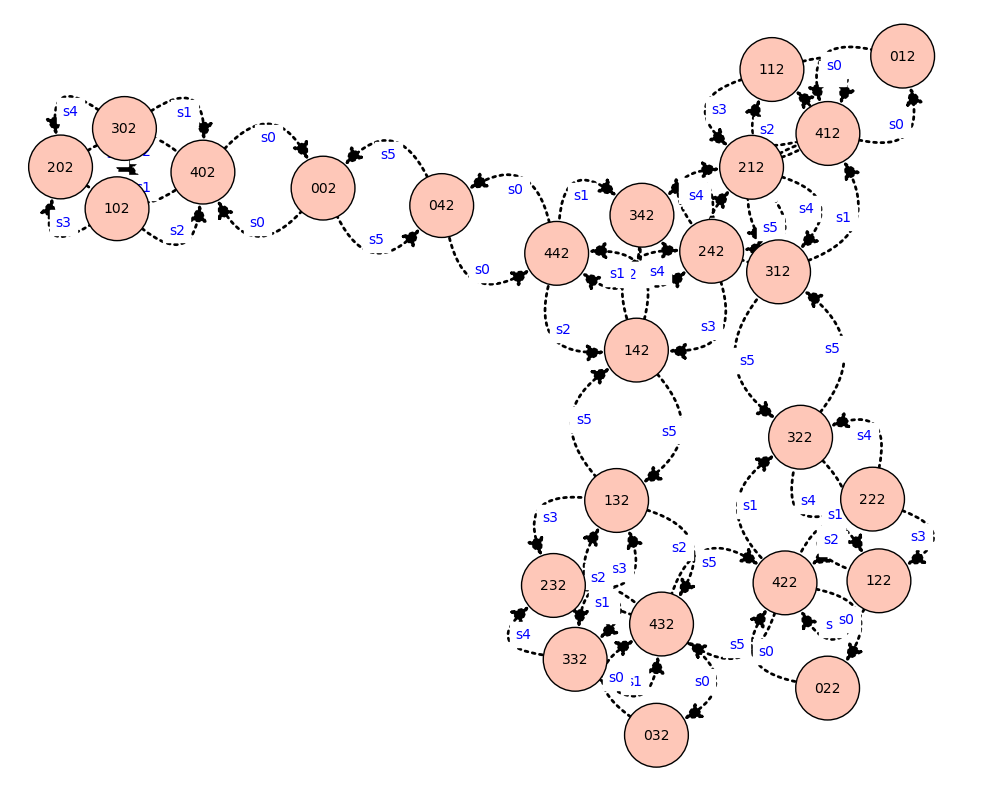

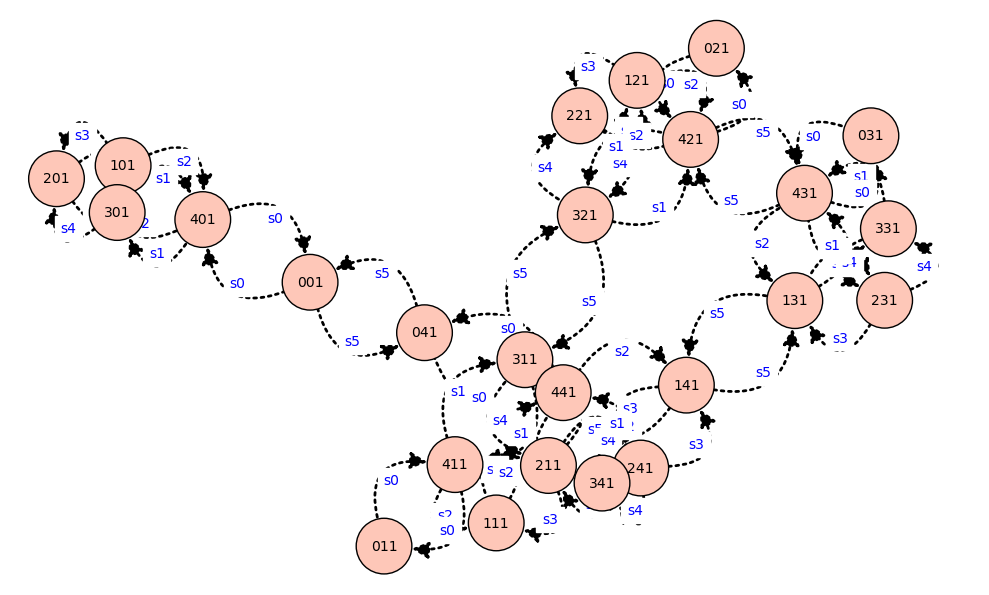

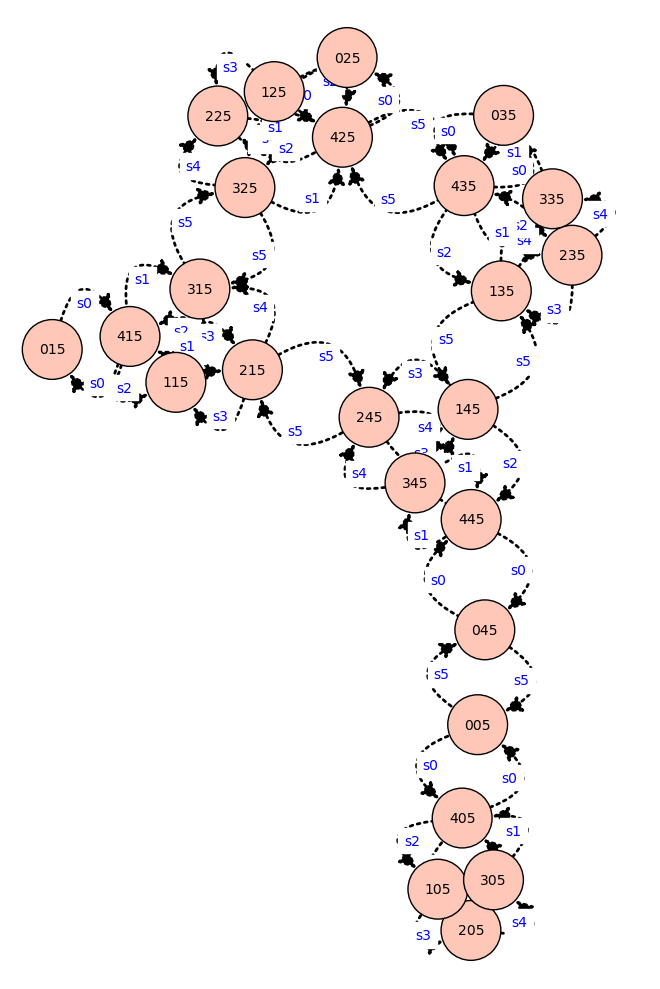

In [ ]:
for tmp in schreier_graph(suspicious[-6], DiGraph, level=3, 
                          loops=False, show=False).connected_components_subgraphs():
    _plt = tmp.plot(edge_labels=True, edge_style=':')
    _plt.show(figsize=(10, 10))

In [13]:
G


AutomataGroup G#16
over alphabet {'0', '1', '3', '2'}
generated by <G#16(s0 = (3)(0 2) (e, e, e, e)), G#16(s1 = (3)(0 1) (e, e, e, e)), G#16(s2 = (3)(1 2) (e, e, e, e)), G#16(s3 = (3) (s0, s1, s2, s3))>.
        

In [ ]:
s0 = Autom

In [14]:
G('s0s1')('123')

'223'

In [19]:
def schreier_graph(group, graph_factory, level, loops=True, figsize=(15, 15), 
                   vertex_size=15, directed=True, show=True):
    
    graph = graph_factory(loops=loops, multiedges=True)
    used = set()
    for u in permute(group.expected_words, repeat=level, allow_same_neighbours=True):
        for el in group.gens:
            v = el(u)
            if not directed and graph.has_edge(v, u): continue
            if not loops and u == v: continue
            graph.add_edge(u, v, el.name)
    
    if show:
        _plt = graph.plot(edge_labels=True, vertex_size=vertex_size, edge_style=':')
        _plt.show(figsize=figsize)
    return graph

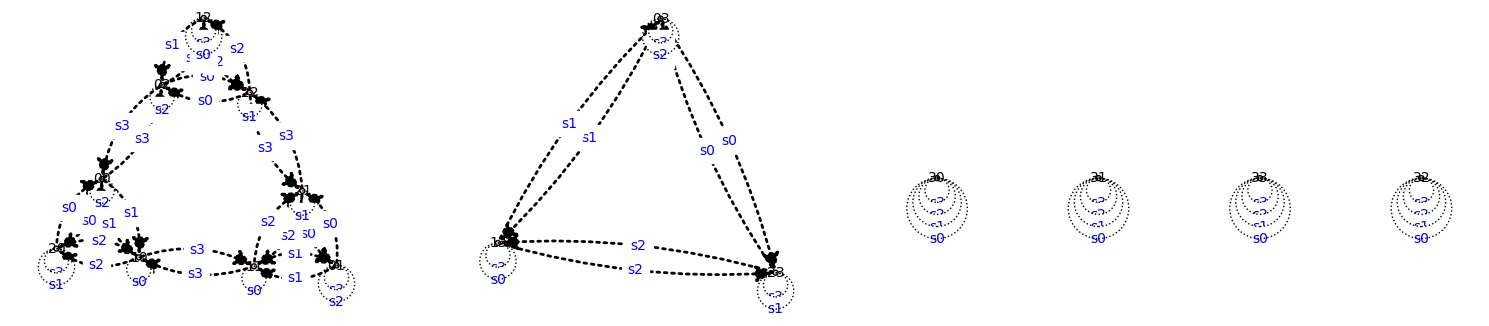

In [54]:
graph = schreier_graph(G, DiGraph, level=2, loops=True)

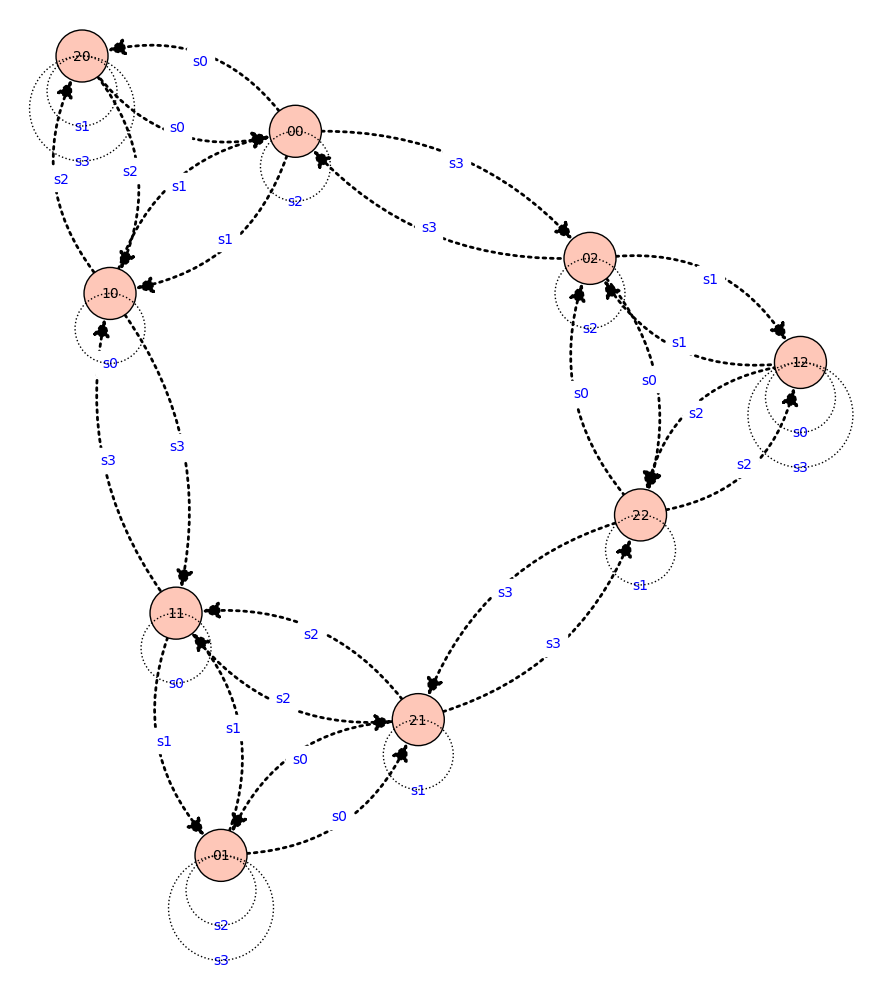

In [59]:
for el in graph.connected_components_subgraphs():
    _plt = el.plot(edge_labels=True, edge_style=':')
    _plt.show(figsize=(10, 10))
    break

In [61]:
for el in all_words(G.alphabet, max_len=10):
    el = G(el)
    if not el.is_finite():
        el.describe(Digraph)
        break

KeyboardInterrupt: 

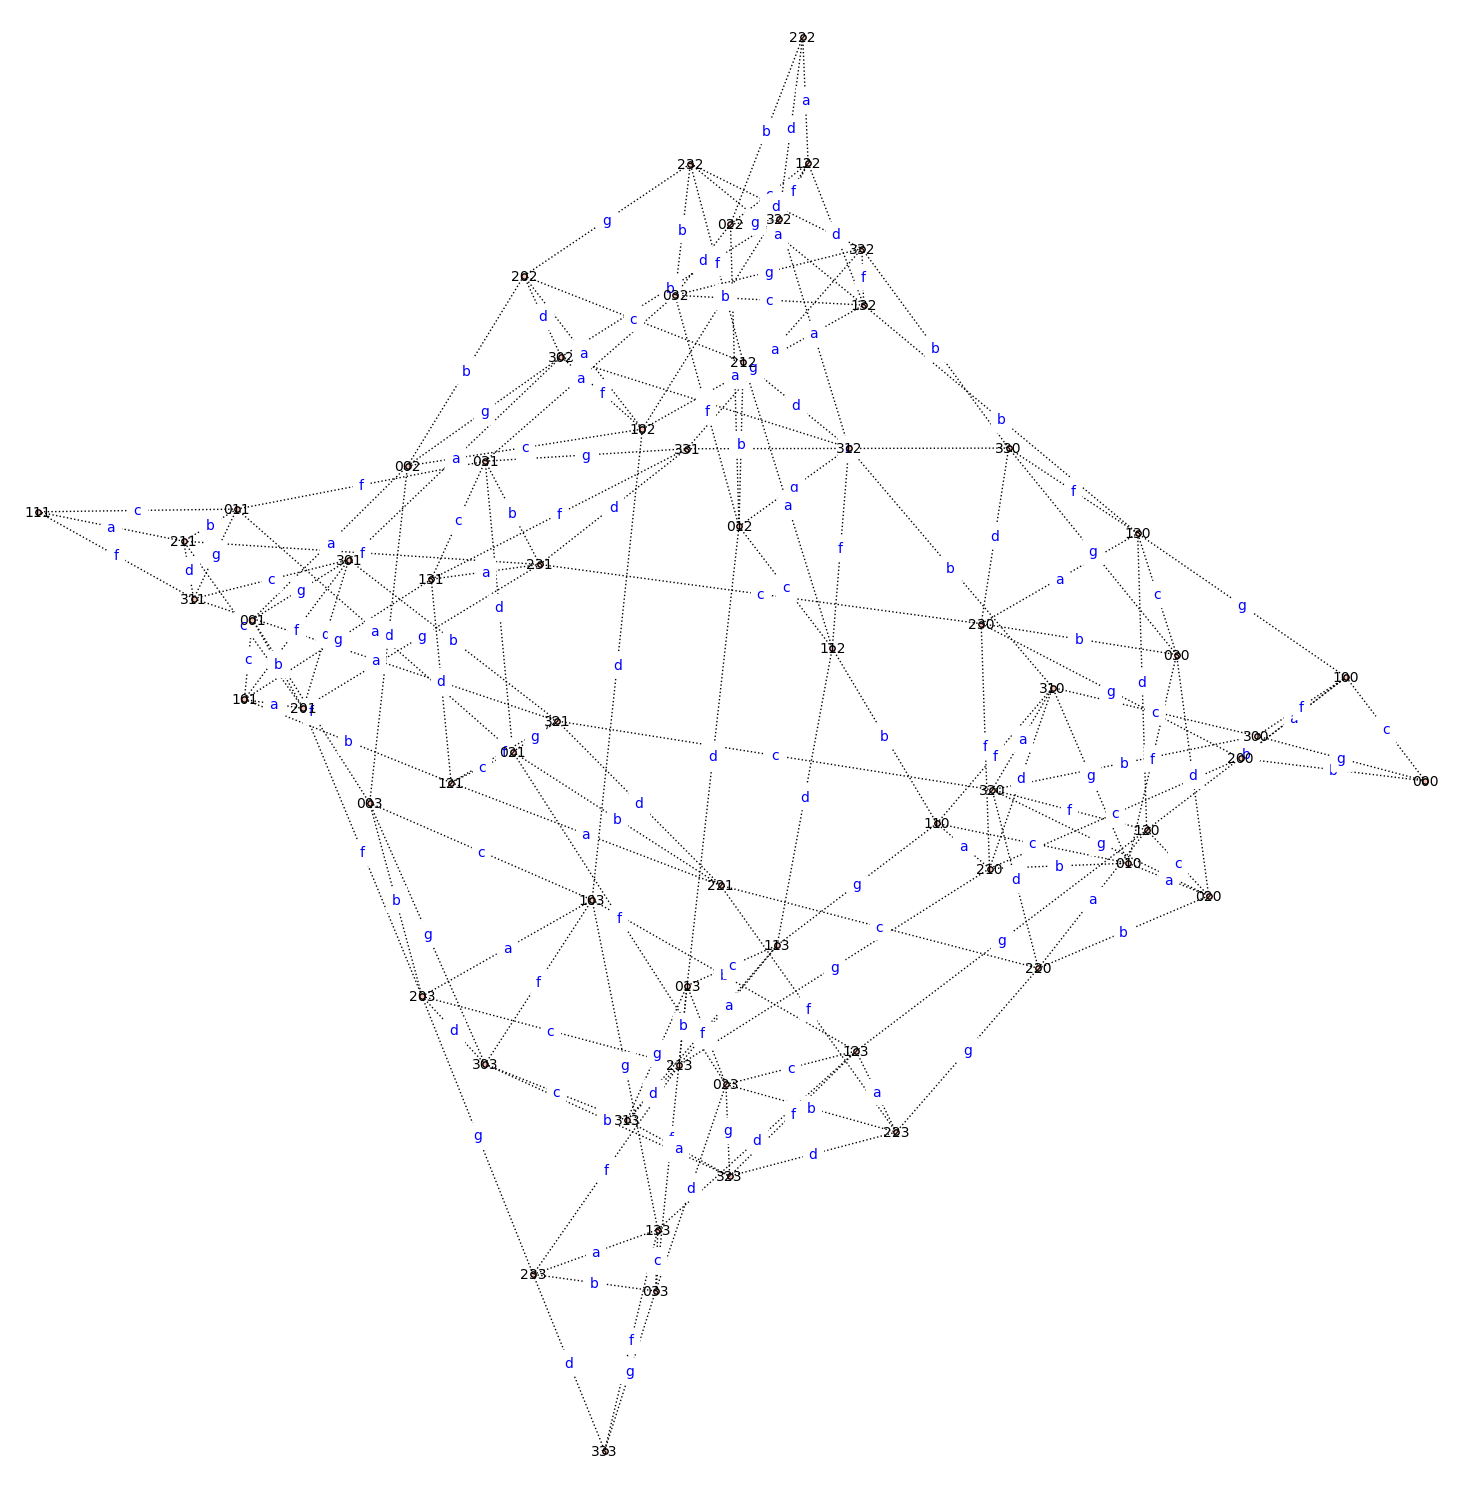

In [46]:
H4_3 = schreier_graph(H4, Graph, level=3, loops=False, directed=False)